# **Classificação de Rocha ou Metal via Sonar** | *Classification "Rock or Metal" via Sonar*

# 1. Entendimento do problema

Imagine que você recebeu dados de coleta de um sonar posicionado em algum ponto do oceano e sua tarefa é identificar qual tipo de objeto o sonar conseguiu captar com base nos sinais coletados.

O presente estudo busca trabalhar com classificação através de sinais deste sonar, de modo que temos as opções do sinal indicar uma rocha ou um cilindro de metal. Temos, para tanto, 60 parâmetros que são indicativos de qual tipo de objeto estamos trabalhando. Queremos, assim, responder algumas questões:

$\bullet$ Como se dá a distribuição de cada um destes parâmetros;

$\bullet$ Existe(m) algum(ns) parâmetros com valores muito discrepantes dos demais?

$\bullet$ Qual a correlação entre os parâmetros? Podemos ignorar algum ou alguns de modo que a classificação não sofra perdas de acurácia?

E, por fim:

$\bullet$ Dentre alguns métodos de classificação que iremos trabalhar (Support Vector Machine, Regressão Logística, Random Forest e Gradient Boosting), qual aquele que retorna melhor acurácia na classificação (rocha ou metal)?

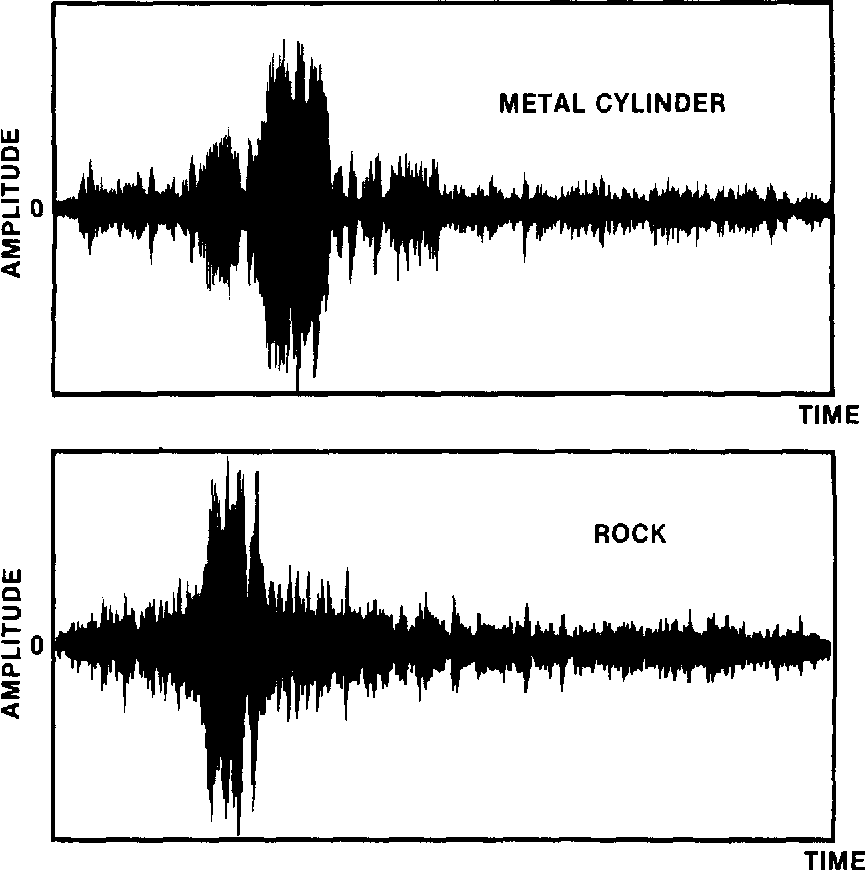


Endereço da imagem: https://d3i71xaburhd42.cloudfront.net/7bdaefdd9954b75fdf305135b27105214c8eac66/3-Figure2-1.png

# Fonte:

O conjunto de dados foi contribuído para a coleta de benchmark por Terry Sejnowski, agora no Salk Institute e na Universidade da Califórnia em San Diego. O conjunto de dados foi desenvolvido em colaboração com R. Paul Gorman, do Allied-Signal Aerospace Technology Center.

O arquivo "sonar.mines" contém 111 padrões obtidos através da projeção de sinais de sonar de um cilindro de metal em vários ângulos e sob várias condições. O arquivo "sonar.rocks" contém 97 padrões obtidos de rochas em condições semelhantes (total de 208 amostras entre metais e rochas). O sinal de sonar transmitido é um sinal chirp (varredura em frequência em regime transiente) modulado em frequência, aumentando em frequência. O conjunto de dados contém sinais obtidos de uma variedade de ângulos de aspecto diferentes, abrangendo 90 graus para o cilindro e 180 graus para a rocha. Ambos os alvos (rocha e cilindro de metal) tinham aproximadamente 5 pés (ft) de comprimento e os retornos foram coletados em um intervalo de 10 metros.

Cada padrão é um conjunto de 60 números no intervalo de 0.0 a 1.0. Cada número representa a energia dentro de uma determinada banda de frequência, integrada ao longo de um determinado período de tempo. A abertura de integração para frequências mais altas ocorre mais tarde, uma vez que essas frequências são transmitidas mais tarde durante o chirp.

O rótulo associado a cada registro contém a letra "R" se o objeto for uma rocha e "M" se for uma mina (cilindro de metal). Os números nas etiquetas estão em ordem crescente de ângulo de aspecto, mas não codificam o ângulo diretamente.

Links das fontes usadas:

Dataset utilizado:
https://sci2s.ugr.es/keel/dataset.php?cod=85

Descrição detalhada e referências:
http://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29

Artigo que usa este dataset:

R.Paul Gorman, Terrence J. Sejnowski, **Analysis of hidden units in a layered network trained to classify sonar targets**, Neural Networks, Volume 1, Issue 1,
1988, Pages 75-89, ISSN 0893-6080,
https://doi.org/10.1016/0893-6080(88)90023-8.
(https://www.sciencedirect.com/science/article/pii/0893608088900238)


# 2. Obtenção do conjunto de dados

Vamos iniciar o estudo importando as bibliotecas que iremos utilizar nesta etapa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Colocamos o arquivo .dat dentro da sessão do Colab, o que requer a importação toda vez que o script for aberto. Caso o script seja executado no Jupyter, não há necessidade de importar o arquivo toda vez, basta incluí-lo na pasta do notebook.

Como o arquivo possui várias linhas de cabeçalho e descrição, foi necessário ajustar e eliminá-las, além de adequar os dados nas colunas corretamente.

In [ ]:
df = pd.read_fwf('sonar.dat',header=None,sep=',')
df = pd.concat([df[0].str.split(', ', expand=True)], axis=1)
df.drop(df.index[np.arange(0,65)], inplace=True)
df = df.reset_index(drop=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.02,0.037,0.043,0.021,0.095,0.099,0.154,0.16,0.311,0.211,0.161,0.158,0.224,0.064,0.066,0.227,0.31,0.3,0.508,0.48,0.578,0.507,0.433,0.555,0.671,0.642,0.71,0.808,0.679,0.386,0.131,0.26,0.512,0.755,0.854,0.851,0.669,0.61,0.494,0.274,0.051,0.283,0.282,0.426,0.264,0.139,0.105,0.134,0.038,0.032,0.023,0.0030,0.0060,0.016,0.0070,0.017,0.018,0.0080,0.0090,0.0030,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,0.492,0.655,0.692,0.78,0.746,0.944,1.0,0.887,0.802,0.782,0.521,0.405,0.396,0.391,0.325,0.32,0.327,0.277,0.442,0.203,0.379,0.295,0.198,0.234,0.131,0.418,0.384,0.106,0.184,0.197,0.167,0.058,0.14,0.163,0.062,0.02,0.053,0.074,0.041,0.0060,0.012,0.0080,0.0090,0.0050,0.0090,0.019,0.014,0.0050,0.0050,0.0040,R
2,0.026,0.058,0.11,0.108,0.097,0.228,0.243,0.377,0.56,0.619,0.633,0.706,0.554,0.532,0.648,0.693,0.676,0.755,0.893,0.862,0.797,0.674,0.429,0.365,0.533,0.241,0.507,0.853,0.604,0.851,0.851,0.504,0.186,0.271,0.423,0.304,0.612,0.676,0.538,0.472,0.465,0.259,0.213,0.222,0.211,0.018,0.135,0.074,0.013,0.011,0.0030,0.023,0.017,0.01,0.018,0.024,0.032,0.016,0.01,0.0080,R
3,0.01,0.017,0.062,0.02,0.02,0.037,0.11,0.128,0.06,0.126,0.088,0.199,0.018,0.226,0.173,0.213,0.069,0.228,0.406,0.397,0.274,0.369,0.556,0.485,0.314,0.533,0.526,0.252,0.209,0.356,0.626,0.734,0.612,0.35,0.395,0.301,0.541,0.881,0.986,0.917,0.612,0.501,0.321,0.32,0.43,0.365,0.266,0.158,0.068,0.029,0.024,0.012,0.0040,0.015,0.0080,0.0070,0.0050,0.0040,0.0040,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,0.415,0.395,0.426,0.414,0.453,0.533,0.731,0.619,0.203,0.464,0.415,0.429,0.573,0.54,0.316,0.228,0.7,1.0,0.726,0.472,0.51,0.546,0.288,0.098,0.195,0.418,0.46,0.322,0.283,0.243,0.198,0.244,0.185,0.084,0.069,0.053,0.036,0.0080,0.023,0.0050,0.016,0.0030,0.0050,0.01,0.011,0.0020,0.0070,0.0050,0.011,0.0090,R
5,0.029,0.045,0.028,0.017,0.038,0.099,0.12,0.183,0.21,0.304,0.299,0.425,0.634,0.82,1.0,0.999,0.951,0.902,0.723,0.512,0.207,0.398,0.589,0.287,0.204,0.578,0.539,0.375,0.341,0.507,0.558,0.478,0.33,0.22,0.141,0.286,0.381,0.416,0.405,0.33,0.271,0.265,0.072,0.124,0.119,0.109,0.062,0.049,0.026,0.0080,0.01,0.0040,0.0010,0.0040,0.0010,0.0090,0.0060,0.0030,0.0050,0.0060,R
6,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.14,0.208,0.351,0.179,0.066,0.051,0.375,0.542,0.544,0.515,0.426,0.202,0.423,0.772,0.974,0.939,0.556,0.527,0.683,0.571,0.543,0.218,0.215,0.581,0.632,0.296,0.187,0.297,0.516,0.615,0.428,0.548,0.613,0.502,0.238,0.196,0.175,0.13,0.06,0.112,0.105,0.051,0.016,0.02,0.02,0.025,0.013,0.0070,0.014,0.0090,0.014,0.0040,0.01,R
7,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,0.28,0.309,0.266,0.38,0.563,0.438,0.262,0.12,0.668,0.94,0.783,0.535,0.681,0.917,0.761,0.822,0.887,0.609,0.297,0.11,0.132,0.062,0.099,0.401,0.367,0.105,0.192,0.393,0.429,0.255,0.115,0.22,0.188,0.144,0.215,0.236,0.112,0.025,0.028,0.018,0.0050,0.0080,0.012,0.0040,0.012,0.01,0.0080,0.0050,0.0050,0.0050,R
8,0.022,0.038,0.048,0.048,0.065,0.059,0.075,0.01,0.068,0.149,0.116,0.165,0.383,0.36,0.171,0.114,0.035,0.38,0.74,0.992,0.98,0.889,0.671,0.429,0.337,0.737,0.961,0.735,0.486,0.159,0.301,0.41,0.317,0.33,0.341,0.219,0.246,0.273,0.168,0.279,0.256,0.174,0.212,0.11,0.098,0.127,0.146,0.116,0.078,0.044,0.0060,0.014,0.013,0.014,0.0060,0.0050,0.0060,0.0090,0.0060,0.0020,R
9,0.016,0.017,0.035,0.0070,0.019,0.067,0.106,0.07,0.096,0.025,0.08,0.106,0.127,0.089,0.02,0.113,0.283,0.323,0.324,0.433,0.607,0.765,0.92,0.972,0.921,0.754,0.829,0.891,0.731,0.69,0.583,0.494,0.31,0.031,0.024,0.111,0.159,0.137,0.07,0.045,0.062,0.142,0.16,0.138,0.037,0.069,0.087,0.051,0.0090,0.02,0.012,0.0090,0.022,0.018,0.0080,0.0070,0.0030,0.0040,0.0060,0.0040,R


O conjunto de dados em si não apresenta descrição alguma, o que de fato torna a análise exploratória dos dados menos interpretável do ponto de vista de o que estamos relacionando com o que. No entanto, iremos focar na relação entre cada uma das colunas e como estão distribuídos estes dados.

Iremos agora avançar com a Análise Exploratória dos dados e procurar entender a dinâmica que existe entre os dados e como podemos extrair informações úteis para o estudo.

# 3. Análise Exploratória dos Dados (EDA) - Visão geral do conjunto de dados
Nessa etapa, iremos

$\bullet$  Identificar o tipo de cada variável (numérica, categórica, temporal)

$\bullet$   Identificar qual é a variável target (alvo) para o nosso problema

$\bullet$   Exploração dos dados (medidas descritivas, distribuição das variáveis)

# A. Identificando as variáveis presentes no dataset

In [ ]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       208 non-null    object
 1   1       208 non-null    object
 2   2       208 non-null    object
 3   3       208 non-null    object
 4   4       208 non-null    object
 5   5       208 non-null    object
 6   6       208 non-null    object
 7   7       208 non-null    object
 8   8       208 non-null    object
 9   9       208 non-null    object
 10  10      208 non-null    object
 11  11      208 non-null    object
 12  12      208 non-null    object
 13  13      208 non-null    object
 14  14      208 non-null    object
 15  15      208 non-null    object
 16  16      208 non-null    object
 17  17      208 non-null    object
 18  18      208 non-null    object
 19  19      208 non-null    object
 20  20      208 non-null    object
 21  21      208 non-null    object
 22  22      208 non-null    ob

Podemos observar aqui que as variáveis nas colunas de número $0$ a $59$ estão categorizados como objetos. Temos que transformá-los em variáveis do tipo float para avançarmos com a análise. A variável na coluna $60$ não necessita de transformação, uma vez que é a nossa variável alvo (rocha ou metal).


**Alterando os tipos das variáveis para a forma mais conveniente**

In [ ]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

coerce_df_columns_to_numeric(df, np.arange(0,60))

In [ ]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

Podemos ver agora que as variáveis estão com os tipos convenientes. Precisamos, além disso, verificar a existência de linhas com *NaNs* e eliminá-las, de modo que o conjunto de dados não comprometa os insights que buscamos.

**Excluindo linhas com *NaNs***

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       206 non-null    float64
 1   1       206 non-null    float64
 2   2       206 non-null    float64
 3   3       206 non-null    float64
 4   4       206 non-null    float64
 5   5       206 non-null    float64
 6   6       206 non-null    float64
 7   7       206 non-null    float64
 8   8       206 non-null    float64
 9   9       206 non-null    float64
 10  10      206 non-null    float64
 11  11      206 non-null    float64
 12  12      206 non-null    float64
 13  13      206 non-null    float64
 14  14      206 non-null    float64
 15  15      206 non-null    float64
 16  16      206 non-null    float64
 17  17      206 non-null    float64
 18  18      206 non-null    float64
 19  19      206 non-null    float64
 20  20      206 non-null    float64
 21  21      206 non-null    float64
 22  22

Observamos que de 208 temos uma redução para 206 amostras, redução esta que não afeta de forma significativa a análise, uma vez que ainda temos número expressivo de dados para trabalhar.

# B. Identificando a variável alvo

Como mencionado anteriormente, o nosso objetivo é construir um modelo de classificação que, dadas as informações das colunas de número $0$ a $59$, consiga entregar a informação de identificação de rocha ($R$) ou metal ($M$). Dessa forma, nossa variável alvo será a coluna de número $60$ do conjunto de dados. Para facilitar, iremos renomear esta coluna com o nome `var_alvo`.

In [ ]:
df = df.rename({60:'var_alvo'}, axis=1)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,var_alvo
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,0.161,0.158,0.224,0.064,0.066,0.227,0.310,0.300,0.508,0.480,0.578,0.507,0.433,0.555,0.671,0.642,0.710,0.808,0.679,0.386,0.131,0.260,0.512,0.755,0.854,0.851,0.669,0.610,0.494,0.274,0.051,0.283,0.282,0.426,0.264,0.139,0.105,0.134,0.038,0.032,0.023,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,0.492,0.655,0.692,0.780,0.746,0.944,1.000,0.887,0.802,0.782,0.521,0.405,0.396,0.391,0.325,0.320,0.327,0.277,0.442,0.203,0.379,0.295,0.198,0.234,0.131,0.418,0.384,0.106,0.184,0.197,0.167,0.058,0.140,0.163,0.062,0.020,0.053,0.074,0.041,0.006,0.012,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,0.633,0.706,0.554,0.532,0.648,0.693,0.676,0.755,0.893,0.862,0.797,0.674,0.429,0.365,0.533,0.241,0.507,0.853,0.604,0.851,0.851,0.504,0.186,0.271,0.423,0.304,0.612,0.676,0.538,0.472,0.465,0.259,0.213,0.222,0.211,0.018,0.135,0.074,0.013,0.011,0.003,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,0.088,0.199,0.018,0.226,0.173,0.213,0.069,0.228,0.406,0.397,0.274,0.369,0.556,0.485,0.314,0.533,0.526,0.252,0.209,0.356,0.626,0.734,0.612,0.350,0.395,0.301,0.541,0.881,0.986,0.917,0.612,0.501,0.321,0.320,0.430,0.365,0.266,0.158,0.068,0.029,0.024,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,0.415,0.395,0.426,0.414,0.453,0.533,0.731,0.619,0.203,0.464,0.415,0.429,0.573,0.540,0.316,0.228,0.700,1.000,0.726,0.472,0.510,0.546,0.288,0.098,0.195,0.418,0.460,0.322,0.283,0.243,0.198,0.244,0.185,0.084,0.069,0.053,0.036,0.008,0.023,0.005,0.016,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R


# C. Análise exploratória dos dados

Vamos obter algumas medidas descritivas para entender melhor como estão estruturados os dados.

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.00000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.029379,0.038762,0.044214,0.054272,0.075471,0.104840,0.121883,0.135267,0.178490,0.208757,0.236490,0.250316,0.273573,0.297864,0.321631,0.379544,0.416602,0.452684,0.504966,0.563286,0.608927,0.623359,0.645597,0.670718,0.672840,0.697971,0.701180,0.695146,0.644971,0.582626,0.505257,0.439505,0.41767,0.403951,0.393286,0.385723,0.365146,0.340791,0.326937,0.311947,0.290058,0.278956,0.246791,0.214364,0.197874,0.161383,0.122816,0.091641,0.052165,0.020549,0.016175,0.013461,0.010752,0.010942,0.009306,0.008248,0.007874,0.007961,0.007985,0.006529
std,0.022991,0.032933,0.038452,0.046549,0.055759,0.059313,0.062110,0.085377,0.118659,0.134768,0.133107,0.140616,0.141569,0.164531,0.205822,0.233531,0.264826,0.262506,0.259030,0.263813,0.259039,0.256852,0.250776,0.239219,0.244629,0.237546,0.245892,0.236505,0.237369,0.220633,0.214901,0.214032,0.20677,0.230798,0.259508,0.265134,0.240723,0.213629,0.199713,0.179160,0.171694,0.169387,0.139556,0.133827,0.152165,0.134155,0.087246,0.062638,0.036031,0.013651,0.012030,0.009674,0.007097,0.007318,0.007122,0.005747,0.005826,0.006467,0.006185,0.005054
min,0.002000,0.001000,0.002000,0.006000,0.007000,0.010000,0.003000,0.006000,0.008000,0.011000,0.029000,0.024000,0.018000,0.027000,0.003000,0.016000,0.035000,0.038000,0.049000,0.066000,0.051000,0.022000,0.056000,0.024000,0.024000,0.092000,0.048000,0.028000,0.041000,0.061000,0.048000,0.040000,0.04800,0.021000,0.022000,0.008000,0.035000,0.038000,0.037000,0.012000,0.036000,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.001000
25%,0.014000,0.017000,0.019250,0.024250,0.037250,0.067000,0.080250,0.080250,0.097000,0.112000,0.127000,0.133250,0.165250,0.176000,0.165750,0.195500,0.205250,0.242000,0.299000,0.350250,0.395250,0.405750,0.446750,0.540250,0.524000,0.542750,0.528000,0.536000,0.466250,0.413000,0.339750,0.279750,0.26000,0.218250,0.180500,0.153500,0.160000,0.174250,0.170750,0.187250,0.164000,0.158250,0.155000,0.127000,0.094250,0.069000,0.064250,0.045000,0.026000,0.012000,0.008250,0.007000,0.005000,0.005000,0.004000,0.004000,0.004000,0.004000,0.004000,0.003000
50%,0.023000,0.031000,0.034500,0.044000,0.063000,0.092000,0.107000,0.112500,0.152000,0.182500,0.224500,0.249000,0.264000,0.282000,0.285500,0.310500,0.308500,0.368500,0.435000,0.542500,0.618000,0.665000,0.700000,0.695500,0.718000,0.753500,0.745500,0.732000,0.682500,0.609000,0.491500,0.429500,0.39100,0.351000,0.313000,0.321500,0.313000,0.315000,0.285000,0.278000,0.260500,0.248500,0.222500,0.178000,0.148000,0.121500,0.102000,0.078000,0.045000,0.018000,0.014000,0.012000,0.010000,0.009500,0.008000,0.007000,0.006000,0.006000,0.006500,0.005000
75%,0.035750,0.048000,0.058750,0.066750,0.102250,0.134000,0.154000,0.169750,0.234500,0.269500,0.302000,0.331750,0.351750,0.387250,0.453000,0.536500,0.660500,0.679000,0.732500,0.809750,0.819000,0.832000,0.844750,0.870250,0.868000,0.893250,0.915000,0.903500,0.852750,0.738250,0.644750,0.590750,0.55750,0.590250,0.595250,0.556750,0.527500,0.441500,0.440250,0.424750,0.390500,0.386000,0.325500,0.276500,0.233250,0.200750,0.154750,0.120750,0.069500,0.02

Observamos que cada variável apresenta $206$ amostras, com médias que variam de $0.0065$ até $0.7012$. Notamos ainda que os valores de todas as colunas variam de $0$ até $1$, tornando as variáveis comparáveis sem necessidade de transformação por conta de escalas diferentes. Iremos analisar melhor os dados a partir de gráficos, uma vez que a tabela, da forma como está, não é a melhor opção para alguns *insights*.

# Distribuição das variáveis

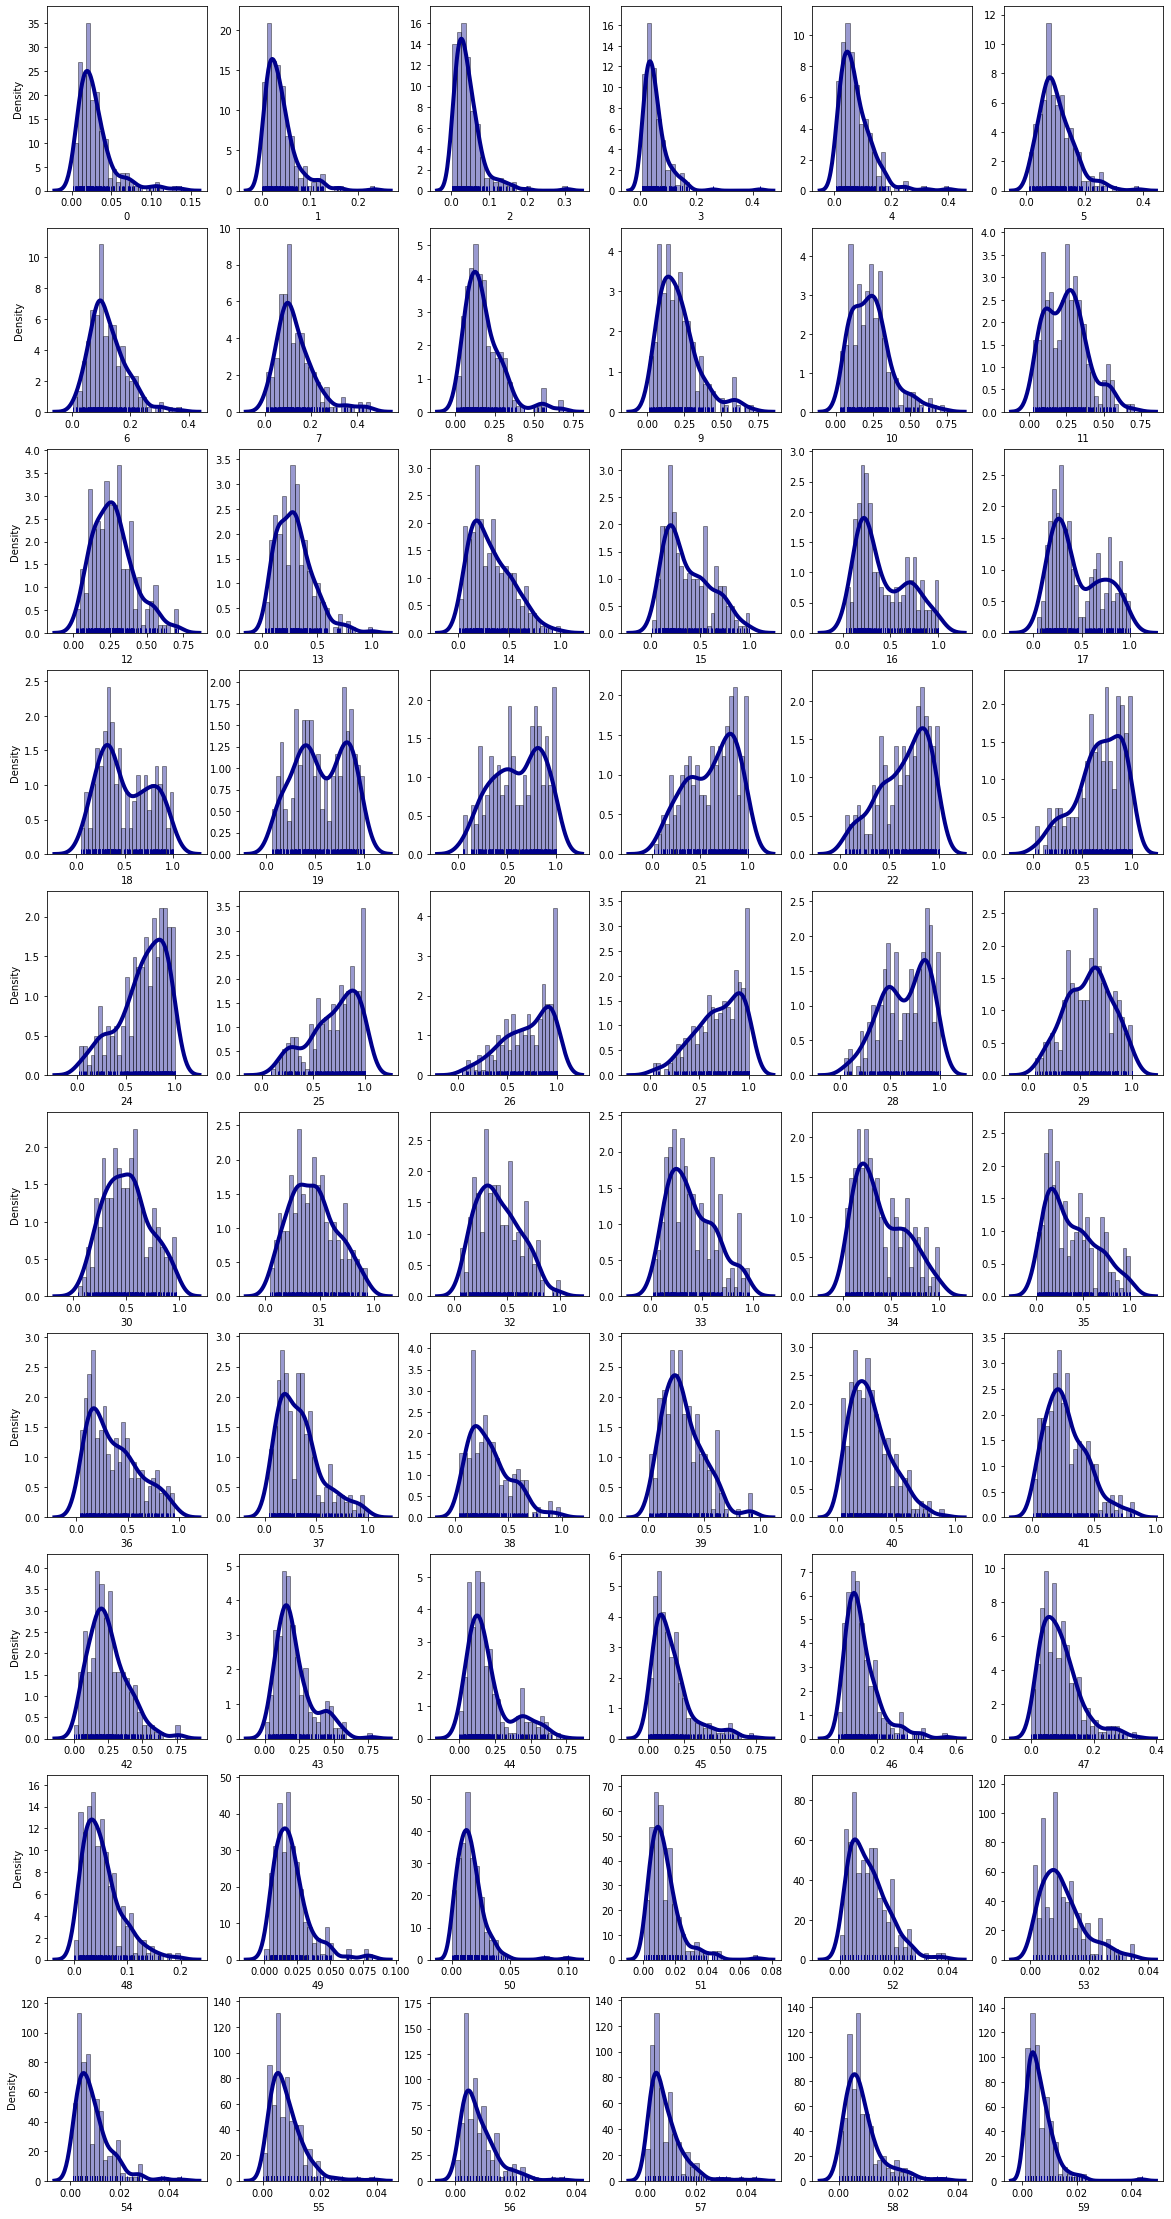

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,40))

for i in range(0,60):
  
  plt.subplot(10,6,i+1)

  sns.distplot(df[i], hist=True, kde=True, rug = True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
  
  if i%6==0 or i==0:
    plt.ylabel('Density')
  else:
    plt.ylabel('')

Dos histogramas e densidades, podemos concluir que existem grupos de variáveis que apresentam o mesmo comportamento (ou comportamentos similares) na distribuição. Os grupos que podemos elencar são:

$\bullet$ Colunas `1,2,3,4,5,6,7,8,9,14,38,39,40,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,58,59`: dados com assimetria positiva;

$\bullet$ Colunas `20,21,22,23,24,25,26,27`: dados com assimetria negativa;

$\bullet$ Colunas `10,11,16,17,18,19`: dados com comportamento bimodal ou multimodal

Além destes, existem outros comportamentos que não serão comentados aqui, no entanto nota-se que podemos admitir certo grau de correlação entre as distribuições similares, o que veremos adiante na matriz de correlação, de modo que é possível diminuir a quantidade de variáveis utilizadas no modelo, ao invés de usar todas.


**Análise de boxplot**

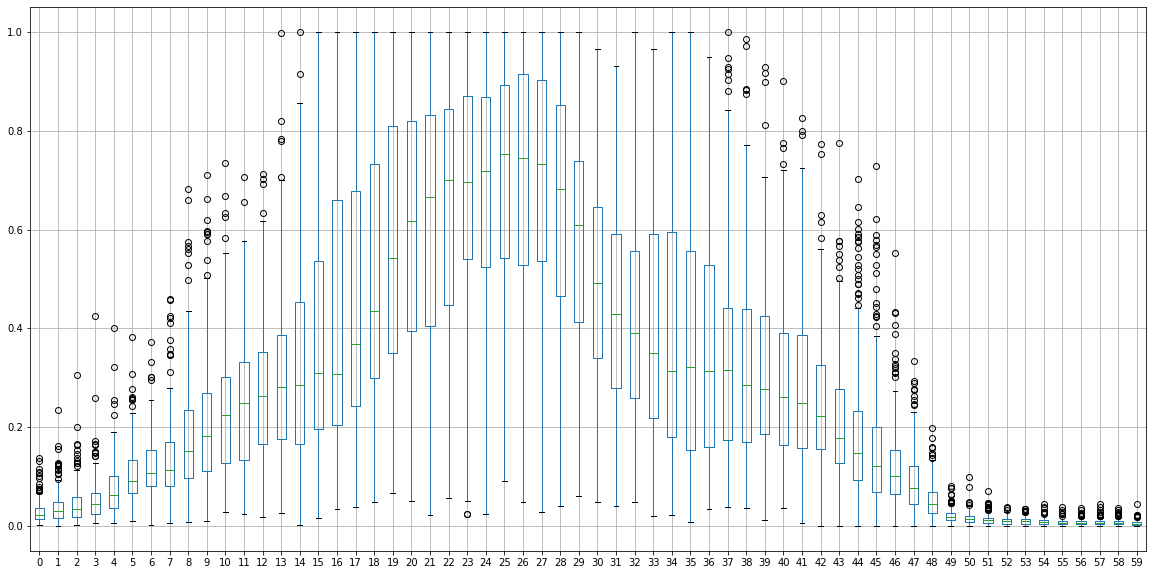

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()

Observamos que as variáveis de número `0` até `14` e `37` até `59` apresentam *outliers*; no entanto, as variáveis de número `15` até `36`, apesar de não apresentarem *outliers*, possuem uma intervalo inter-quartílico grande, isto é, alta variabilidade nos dados, o que não é interessante, uma vez que abre espaço para previsões errôneas. Vamos verificar agora como se dão as correlações entre variáveis duas a duas para decidirmos quais iremos utilizar na construção dos modelos de classificação.

**Matriz de Correlação**

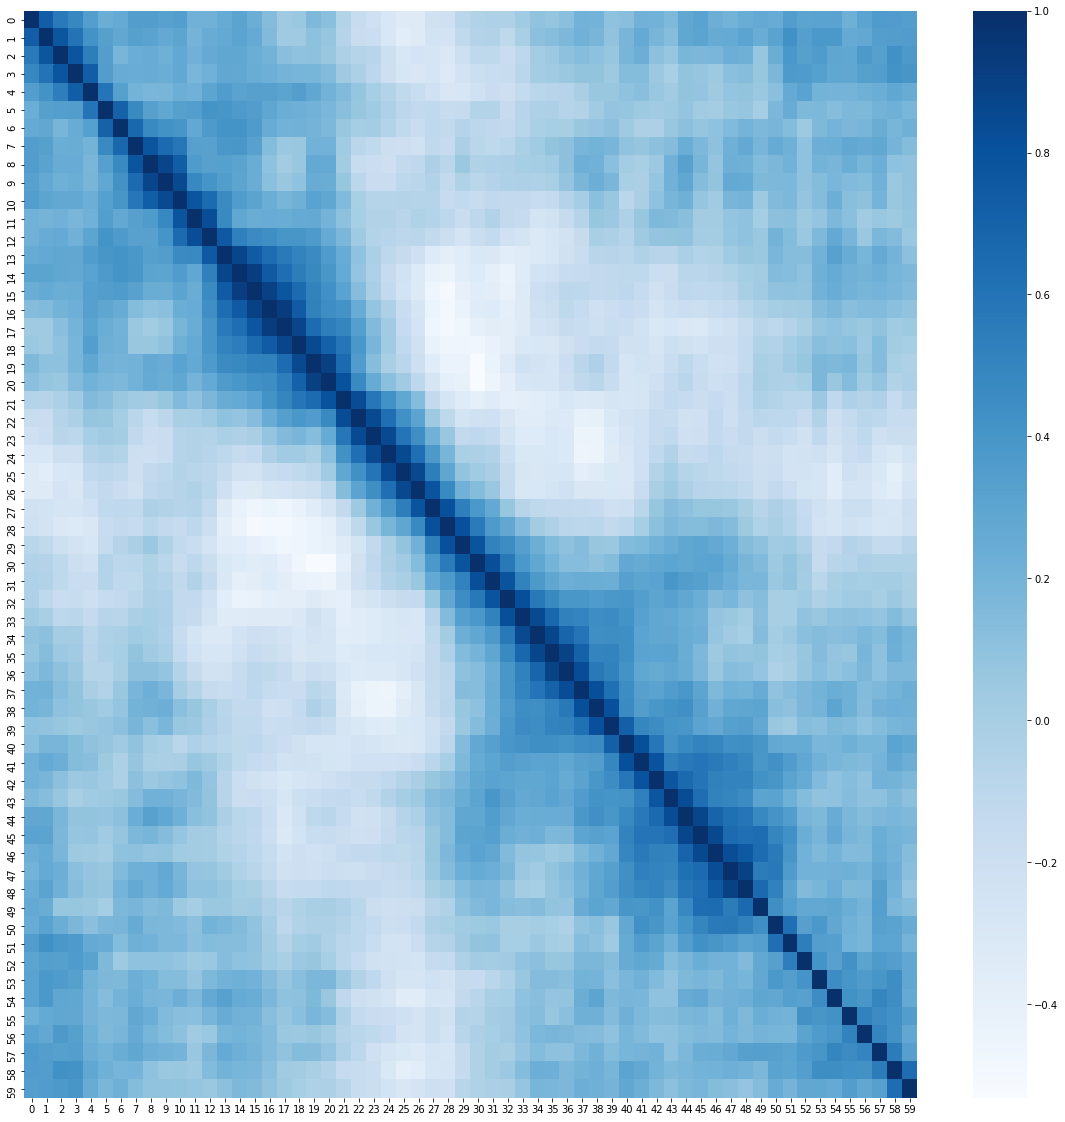

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = False, cmap='Blues');

Podemos observar pela matriz de correlação que variáveis próximas (por exemplo as colunas `0, 1, 2, 3` e `4`) apresentam razoável nível de correlação entre si, principalmente as próximas duas a duas (`0` e `1`, `1` e `2`, `2` e `3`, `3` e `4` e assim por diante). Verificamos ainda um núcleo de *forte* correlação no intervalo das variáveis de número `13` até `22`.

Vamos adotar alguns intervalos de variáveis para construção dos modelos e verificar quais variáveis retornam melhores porcentagens de predição.

# 4. Modelos de Classificação

Importando biblioteca para separação de dados de treino (aprendizado) e teste.

In [ ]:
from sklearn.model_selection import train_test_split

**Estratégia de seleção de variáveis**

Vamos utilizar $3$ grupos de variáveis, cada um com uma justificativa e sua peculiaridade:

$\bullet$ Grupo $1$: compreende todas as variáveis, isto é, todas as colunas de número $0$ até $59$;

$\bullet$ Grupo $2$: compreende as variáveis de número $0$ até $59$ intercaladas de $4$ em $4$, ou seja, colunas `0`, `4`, `8`, ..., `56` - aqui utilizamos esta abordagem para tentar contornar a correlação entre variáveis de colunas próximas;

$\bullet$ Grupo $3$: compreende as variáveis de número $0$ até $59$ intercaladas de $4$ em $4$, com um intervalo maior entre a coluna `13` e a coluna `22`, ou seja, teremos o conjunto de colunas [`0,4,8,12,24,28,32,36,40,44,48,52,56`] - aqui utilizamos esta abordagem para contornar a correlação entre variáveis de colunas próximas e, como dito anteriormente, tentar limpar ainda mais o conjunto de variáveis retirando o núcleo de *forte* correlação mencionado anteriormente.

Vamos utilizar os seguintes modelos para classificação:

$\bullet$ Support Vector Machine;

$\bullet$ Regressão Logística;

$\bullet$ Random Forest;

$\bullet$ Gradient Boosting.

A métrica que utilizaremos será a acurácia para verificar qual modelo e qual conjunto de dados retorna o melhor resultado.

In [ ]:
X_1, y_1 =  df[np.arange(0,60)], df['var_alvo']

X_2, y_2 =  df[np.arange(0,60,4)], df['var_alvo']

X_3, y_3 =  df[[0,4,8,12,24,28,32,36,40,44,48,52,56]], df['var_alvo']

**Dados de treino (aprendizado) e teste**

Vamos agora dividir o nosso dataset em treino e teste, pela biblioteca **sklearn** e função *train_test_split*, considerando para teste uma seleção de 30% dos dados.

In [ ]:
random__st = 29

# Caso 1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1,test_size=0.30, random_state=random__st)

# Caso 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2,test_size=0.30, random_state=random__st)

# Caso 3
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y_3,test_size=0.30, random_state=random__st)

# A. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svm = SVC(random_state=random__st)
svm.fit(X_train_1, y_train_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=29, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm.fit(X_train_1, y_train_1)
y_prediction_svm_1 = svm.predict(X_test_1)

svm.fit(X_train_2, y_train_2)
y_prediction_svm_2 = svm.predict(X_test_2)

svm.fit(X_train_3, y_train_3)
y_prediction_svm_3 = svm.predict(X_test_3)

print('Caso 1',classification_report(y_test_1, y_prediction_svm_1)); print(' ')
print('Caso 2',classification_report(y_test_2, y_prediction_svm_2)); print(' ')
print('Caso 3',classification_report(y_test_3, y_prediction_svm_3))

Caso 1               precision    recall  f1-score   support

           M       0.71      0.86      0.78        35
           R       0.75      0.56      0.64        27

    accuracy                           0.73        62
   macro avg       0.73      0.71      0.71        62
weighted avg       0.73      0.73      0.72        62

 
Caso 2               precision    recall  f1-score   support

           M       0.62      0.69      0.65        35
           R       0.52      0.44      0.48        27

    accuracy                           0.58        62
   macro avg       0.57      0.57      0.56        62
weighted avg       0.57      0.58      0.58        62

 
Caso 3               precision    recall  f1-score   support

           M       0.72      0.83      0.77        35
           R       0.73      0.59      0.65        27

    accuracy                           0.73        62
   macro avg       0.73      0.71      0.71        62
weighted avg       0.73      0.73      0.72      

Observamos que os melhores valores de acurácia foram obtidos para os **Casos 1** e **3**. Iremos agora utilizar o método Grid Search para tunar os hiperparâmetros a fim de encontrar os valores ótimos e verificar se há ou não melhora nessa métrica de classificação.

In [ ]:
from sklearn.model_selection import GridSearchCV

Aqui, iremos usar para valores de $C$ no intervalo `[0.1, 1, 10, 100, 1000]`, o parâmetro $\gamma$ no intervalo `[1, 0.1, 0.01, 0.001, 0.0001]` e o *kernel* `rbf` (Radial Basis Function).

In [ ]:
svm__param_grid = { 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf'] }
svm__grid = GridSearchCV(SVC(random_state=random__st), svm__param_grid, refit=True, verbose=3)

In [ ]:
svm__grid.fit(X_train_1, y_train_1)
y_prediction_svm_grid_1 = svm__grid.predict(X_test_1)

svm__grid.fit(X_train_2, y_train_2)
y_prediction_svm_grid_2 = svm__grid.predict(X_test_2)

svm__grid.fit(X_train_3, y_train_3)
y_prediction_svm_grid_3 = svm__grid.predict(X_test_3)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.536, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.724, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.793, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.759, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.552, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.536, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.724, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.655, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.517, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


In [ ]:
print('Case 1',classification_report(y_test_1, y_prediction_svm_grid_1)); print(' ')
print('Case 2',classification_report(y_test_2, y_prediction_svm_grid_2)); print(' ')
print('Case 3',classification_report(y_test_3, y_prediction_svm_grid_3));

Case 1               precision    recall  f1-score   support

           M       0.78      0.89      0.83        35
           R       0.82      0.67      0.73        27

    accuracy                           0.79        62
   macro avg       0.80      0.78      0.78        62
weighted avg       0.79      0.79      0.79        62

 
Case 2               precision    recall  f1-score   support

           M       0.70      0.74      0.72        35
           R       0.64      0.59      0.62        27

    accuracy                           0.68        62
   macro avg       0.67      0.67      0.67        62
weighted avg       0.68      0.68      0.68        62

 
Case 3               precision    recall  f1-score   support

           M       0.71      0.77      0.74        35
           R       0.67      0.59      0.63        27

    accuracy                           0.69        62
   macro avg       0.69      0.68      0.68        62
weighted avg       0.69      0.69      0.69      

Observamos que nos **Casos 1** e **2** houve melhora na acurácia, enquanto que para o **Caso 3** a acurácia diminuiu. Assim, para este modelo com a otimização de hiperparâmetros feita por Grid Search, o conjunto de dados do **Caso 1** foi superior, considerando a acurácia como métrica de comparação.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_svm_grid_1 = accuracy_score(y_prediction_svm_grid_1, y_test_1)
accuracy_svm_grid_2 = accuracy_score(y_prediction_svm_grid_2, y_test_2)
accuracy_svm_grid_3 = accuracy_score(y_prediction_svm_grid_3, y_test_3)

print("Acurácia do Support Vector Machine com Grid Search - Caso 1: ", accuracy_svm_grid_1)
print("Acurácia do Support Vector Machine com Grid Search - Caso 2: ", accuracy_svm_grid_2)
print("Acurácia do Support Vector Machine com+ Grid Search - Caso 3: ", accuracy_svm_grid_3)

Acurácia do Support Vector Machine com Grid Search - Caso 1:  0.7903225806451613
Acurácia do Support Vector Machine com Grid Search - Caso 2:  0.6774193548387096
Acurácia do Support Vector Machine com+ Grid Search - Caso 3:  0.6935483870967742


# B. Regressão Logística

Utilizaremos o modelo de Regressão Logística com valores *default* da biblioteca `sklearn`; somente mudamos o `random_state` para garantir reprodutibilidade.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=random__st)

In [ ]:
lr.fit(X_train_1, y_train_1)
y_prediction_lr_1 = lr.predict(X_test_1)

lr.fit(X_train_2, y_train_2)
y_prediction_lr_2 = lr.predict(X_test_2)

lr.fit(X_train_3, y_train_3)
y_prediction_lr_3 = lr.predict(X_test_3)

accuracy_lr_1 = accuracy_score(y_prediction_lr_1, y_test_1)
accuracy_lr_2 = accuracy_score(y_prediction_lr_2, y_test_2)
accuracy_lr_3 = accuracy_score(y_prediction_lr_3, y_test_3)

print("Acurácia da Regressão Logística - Caso 1: ", accuracy_lr_1)
print("Acurácia da Regressão Logística - Caso 2: ", accuracy_lr_2)
print("Acurácia da Regressão Logística - Caso 3: ", accuracy_lr_3)

Acurácia da Regressão Logística - Caso 1:  0.7419354838709677
Acurácia da Regressão Logística - Caso 2:  0.6451612903225806
Acurácia da Regressão Logística - Caso 3:  0.6451612903225806


Observa-se que neste caso, assim como para a estratégia usando Support Vector Machine, os dados do **Caso 1** apresentam melhor resultado para acurácia. Iremos agora tunar os parâmetros com o Grid Search.

Tunando parâmetros com Grid Search, iremos utilizar as normas $l_1$ e $l_2$ para penalização e valores de $C$ no intervalo `[0.001,.009,0.01,.09,1,5,10,25]`.

In [ ]:
lr_grid = LogisticRegression(random_state=random__st)
lr_grid_values = { 'penalty': ['l1', 'l2'], 'C': [0.001,.009,0.01,.09,1,5,10,25] }

In [ ]:
lr_grid_cv = GridSearchCV(lr_grid, param_grid=lr_grid_values, scoring='accuracy')

In [ ]:
lr_grid_cv.fit(X_train_1, y_train_1)
y_prediction_lr_grid_1 = lr_grid_cv.predict(X_test_1)

lr_grid_cv.fit(X_train_2, y_train_2)
y_prediction_lr_grid_2 = lr_grid_cv.predict(X_test_2)

lr_grid_cv.fit(X_train_3, y_train_3)
y_prediction_lr_grid_3 = lr_grid_cv.predict(X_test_3)

accuracy_lr_grid_1 = accuracy_score(y_prediction_lr_grid_1, y_test_1)
accuracy_lr_grid_2 = accuracy_score(y_prediction_lr_grid_2, y_test_2)
accuracy_lr_grid_3 = accuracy_score(y_prediction_lr_grid_3, y_test_3)

print("Acurácia da Regressão Logística com Grid Search - Caso 1: ", accuracy_lr_grid_1)
print("Acurácia da Regressão Logística com Grid Search - Caso 2: ", accuracy_lr_grid_2)
print("Acurácia da Regressão Logística com Grid Search - Caso 3: ", accuracy_lr_grid_3)

Acurácia da Regressão Logística com Grid Search - Caso 1:  0.7419354838709677
Acurácia da Regressão Logística com Grid Search - Caso 2:  0.6129032258064516
Acurácia da Regressão Logística com Grid Search - Caso 3:  0.6612903225806451


Os dados para o **Caso 1** foram superiores em acurácia, com **Caso 3** na sequência. Iremos agora verificar o desempenho do modelo Random Forest.

# C. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Iremos utilizar o modelo de classificação Random Forest com Bootstrap, para a qualidade do *split* usaremos o critério de Gini, o número de *features* ao se condiserar o melhor *split* será dado por $\sqrt{n_{features}}$. 

In [ ]:
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto', random_state=random__st)

In [ ]:
rfc.fit(X_train_1, y_train_1)
y_prediction_rfc_1 = rfc.predict(X_test_1)

rfc.fit(X_train_2, y_train_2)
y_prediction_rfc_2 = rfc.predict(X_test_2)

rfc.fit(X_train_3, y_train_3)
y_prediction_rfc_3 = rfc.predict(X_test_3)

accuracy_rfc_1 = accuracy_score(y_prediction_rfc_1, y_test_1)
accuracy_rfc_2 = accuracy_score(y_prediction_rfc_2, y_test_2)
accuracy_rfc_3 = accuracy_score(y_prediction_rfc_3, y_test_3)

print("Acurácia do Random Forest Classifier - Caso 1: ", accuracy_rfc_1)
print("Acurácia do Random Forest Classifier - Caso 2: ", accuracy_rfc_2)
print("Acurácia do Random Forest Classifier - Caso 3: ", accuracy_rfc_3)

Acurácia do Random Forest Classifier - Caso 1:  0.7903225806451613
Acurácia do Random Forest Classifier - Caso 2:  0.6935483870967742
Acurácia do Random Forest Classifier - Caso 3:  0.7258064516129032


Observamos que os dados do **Caso 1** e **3** apresentam os melhores valores de acurácia. Iremos agora tunar os parâmetros com Randomized Search e verificar se há melhoras na classificação. Serão utilizados números de estimadores entre 200 e 2000, com passo de 200, número máximo de *features* dado por $\sqrt{n_{features}}$, máxima profundidade da árvore entre 10 e 110 com passo de 10, número mínimo de amostras necessário para dividir um nó interno no intervalo `[2,5,10]`, número mínimo de amostras necessário para um nó de folha no intervalo `[1,2,4]` e  busca com e sem Bootstrap. Além disso, considerou-se 10 combinações de parâmetros e validação cruzada com 3 *folds*.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Setup do grid search
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = { 'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap }

In [ ]:
rfc = RandomForestClassifier(random_state=random__st)

In [ ]:
# 3 fold CV, 10 combinations
rfc_random_srch = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=random__st, n_jobs = -1)

In [ ]:
rfc_random_srch.fit(X_train_1, y_train_1)
rfc_uni_best_params = rfc_random_srch.best_params_

rfc_1 = RandomForestClassifier(bootstrap=rfc_uni_best_params["bootstrap"], max_depth=rfc_uni_best_params["max_depth"],
                                 max_features=rfc_uni_best_params["max_features"], min_samples_leaf=rfc_uni_best_params["min_samples_leaf"],
                                 min_samples_split=rfc_uni_best_params["min_samples_split"], n_estimators=rfc_uni_best_params["n_estimators"],
                                 random_state=random__st)

########################################################

rfc_random_srch.fit(X_train_2, y_train_2)
rfc_uni_best_params = rfc_random_srch.best_params_

rfc_2 = RandomForestClassifier(bootstrap=rfc_uni_best_params["bootstrap"], max_depth=rfc_uni_best_params["max_depth"],
                                 max_features=rfc_uni_best_params["max_features"], min_samples_leaf=rfc_uni_best_params["min_samples_leaf"],
                                 min_samples_split=rfc_uni_best_params["min_samples_split"], n_estimators=rfc_uni_best_params["n_estimators"],
                                 random_state=random__st)

########################################################

rfc_random_srch.fit(X_train_3, y_train_3)
rfc_uni_best_params = rfc_random_srch.best_params_

rfc_3 = RandomForestClassifier(bootstrap=rfc_uni_best_params["bootstrap"], max_depth=rfc_uni_best_params["max_depth"],
                                 max_features=rfc_uni_best_params["max_features"], min_samples_leaf=rfc_uni_best_params["min_samples_leaf"],
                                 min_samples_split=rfc_uni_best_params["min_samples_split"], n_estimators=rfc_uni_best_params["n_estimators"],
                                 random_state=random__st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.6s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.6s finished


In [ ]:
rfc_1.fit(X_train_1, y_train_1)
y_prediction_rfc_1 = rfc_1.predict(X_test_1)

rfc_2.fit(X_train_2, y_train_2)
y_prediction_rfc_2 = rfc_2.predict(X_test_2)

rfc_3.fit(X_train_3, y_train_3)
y_prediction_rfc_3 = rfc_3.predict(X_test_3)

accuracy_rfc_1 = accuracy_score(y_prediction_rfc_1, y_test_1)
accuracy_rfc_2 = accuracy_score(y_prediction_rfc_2, y_test_2)
accuracy_rfc_3 = accuracy_score(y_prediction_rfc_3, y_test_3)

print("Acurácia do Random Forest Classifier (com Grid Search) - Caso 1: ", accuracy_rfc_1)
print("Acurácia do Random Forest Classifier (com Grid Search) - Caso 2: ", accuracy_rfc_2)
print("Acurácia do Random Forest Classifier (com Grid Search) - Caso 3: ", accuracy_rfc_3)

Acurácia do Random Forest Classifier (com Grid Search) - Caso 1:  0.8064516129032258
Acurácia do Random Forest Classifier (com Grid Search) - Caso 2:  0.6774193548387096
Acurácia do Random Forest Classifier (com Grid Search) - Caso 3:  0.6612903225806451


Observa-se que houve melhora para os dados do **Caso 1**, porém houve piora para os dados dos casos **2** e **3**, isso considerando a métrica que estamos utilizando, a acurácia. Os dados para o **Caso 1** continuam apresentando melhores resultados.

# D. Gradient Boosting

Por fim, utilizaremos Gradient Boosting como a última estratégia de classificação para os dados do sonar.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Vamos utilizar os parâmetros *default* da biblioteca sklearn.

In [ ]:
gbc = GradientBoostingClassifier(random_state=random__st)
gbc_params = gbc.get_params()

In [ ]:
gcb_params_dist = {'n_estimators': gbc_params['n_estimators'], 'max_features': gbc_params['max_features'],
                   'max_depth': gbc_params['max_depth'], 'min_samples_split': gbc_params['min_samples_split'],
                   'min_samples_leaf': gbc_params['min_samples_leaf'], 'learning_rate': gbc_params['learning_rate'],
                   'subsample': gbc_params['subsample']}

Iremos agora tunar os parâmetros com Randomized Search e verificar o comportamento da acurácia na classificação. Serão utilizados números de estimadores padrão da biblioteca, número máximo de *features* dado por $\sqrt{n_{features}}$, profundidade máxima dos estimadores de regressão individuais no intervalo `[10,40]`, número mínimo de amostras necessário para dividir um nó interno no intervalo `[10,30,50]`, número mínimo de amostras necessário para um nó de folha no intervalo `[1,2,4]`, taxa de aprendizado no intervalo `[0.1, 0.5]` e `subsample` no intervalo `[0.5,1]`. Além disso, considerou-se 10 combinações de parâmetros e validação cruzada com 3 *folds*.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
max_features = ['auto', 'sqrt']
max_depth = [10, 40]
max_depth.append(None)
min_samples_split = [10, 30, 50]
min_samples_leaf = [1, 2, 4]
learning_rate = [.1, .5]
subsample = [.5, 1.]
gcb_params_random = { 'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
                     'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
                     'learning_rate': learning_rate, 'subsample': subsample }

In [ ]:
gcb_random_search_1 = RandomizedSearchCV(estimator=gbc, param_distributions=gcb_params_random, n_iter=10,
                                           scoring='accuracy', cv=3, verbose=1, random_state=random__st)

gcb_random_search_2 = RandomizedSearchCV(estimator=gbc, param_distributions=gcb_params_random, n_iter=10,
                                           scoring='accuracy', cv=3, verbose=1, random_state=random__st)

gcb_random_search_3 = RandomizedSearchCV(estimator=gbc, param_distributions=gcb_params_random, n_iter=10,
                                           scoring='accuracy', cv=3, verbose=1, random_state=random__st)

In [ ]:
gcb_random_search_1.fit(X_train_1, y_train_1)
print("Acurácia do Unigrama Gradient Boosting - Random Search - Caso 1: ", gcb_random_search_1.best_score_)

gcb_random_search_2.fit(X_train_2, y_train_2)
print("Acurácia do Unigrama Gradient Boosting - Random Search - Caso 2: ", gcb_random_search_2.best_score_)

gcb_random_search_3.fit(X_train_3, y_train_3)
print("Acurácia do Unigrama Gradient Boosting - Random Search - Caso 3: ", gcb_random_search_3.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.5s finished


Acurácia do Unigrama Gradient Boosting - Random Search - Caso 1:  0.8402777777777777
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Acurácia do Unigrama Gradient Boosting - Random Search - Caso 2:  0.8472222222222222
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Acurácia do Unigrama Gradient Boosting - Random Search - Caso 3:  0.7847222222222222


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.3s finished


Verifica-se que para este modelo de classificação, foram obtidos os melhores valores para acurácia, sendo o melhor entre os três casos dado pelo **Caso 2**, com acurácia de $0.8472$ aproximadamente. Abaixo tem-se o resumo das acurácias por método e por conjunto de dados.

In [ ]:
data = {'Acurácia':  ['Regressão Logística','Regressão Logística + Grid Search',
                      'Random Forest','Support Vector Machine + Grid Search',
                      'Gradient Boost'],
        'Caso 1 ': [accuracy_lr_1, accuracy_lr_grid_1, accuracy_rfc_1, accuracy_svm_grid_1, gcb_random_search_1.best_score_],
        'Caso 2 ': [accuracy_lr_2, accuracy_lr_grid_2, accuracy_rfc_2, accuracy_svm_grid_2, gcb_random_search_2.best_score_],
        'Caso 3 ': [accuracy_lr_3, accuracy_lr_grid_3, accuracy_rfc_3, accuracy_svm_grid_3, gcb_random_search_3.best_score_]}

df_ = pd.DataFrame(data)

def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]

df_.style.apply(highlight_max)

,Acurácia,Caso 1,Caso 2,Caso 3
0,Regressão Logística,0.741935,0.645161,0.645161
1,Regressão Logística + Grid Search,0.741935,0.612903,0.661290
2,Random Forest,0.806452,0.677419,0.661290
3,Support Vector Machine + Grid Search,0.790323,0.677419,0.693548
4,Gradient Boost,0.840278,0.847222,0.784722


Verificamos que os melhores valores de acurácia são obtidos para modelo de classificação do tipo **Gradient Boost** e o melhor valor obtido foi para o **Caso 2**, ou seja, que compreende as variáveis de número $0$ até $59$ intercaladas de $4$ em $4$, isto é, colunas `0`, `4`, `8`, ..., `56`. Vamos utilizar então este modelo com este conjunto de dados para nosso *deploy*.

# 5. Deploy Básico

Vamos agora realizar um deploy básico de nosso modelo, apresentando uma forma do usuário inserir as informações do sonar e obter uma predição de qual tipo de objeto está sendo identificado (Rocha ou Metal).

Importando a biblioteca para salvar e carregar o modelo.

In [ ]:
import pickle

**Modelo com a melhor acurácia considerando Gradient Boost + Caso 2**

In [ ]:
model = gcb_random_search_2

**Carregando o modelo**

In [ ]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

# Análise das distribuições para verificar discrepâncias entre labels

Iremos plotar um histograma para cada variável considerando os dois *labels* possíveis (Rocha ou Metal) e analisar quais variáveis possuem maior discrepância e podem ser utilizadas como fatores importantes (decisivos) na predição. Iremos tomar uma amostra qualquer do conjunto de testes e modificar algumas destas variáveis discrepantes para verificar se o modelo capta a mudança e altera a saída de acordo com o que se espera.

In [ ]:
df_Rock = df[df['var_alvo']=='R']
df_Metal = df[df['var_alvo']=='M']

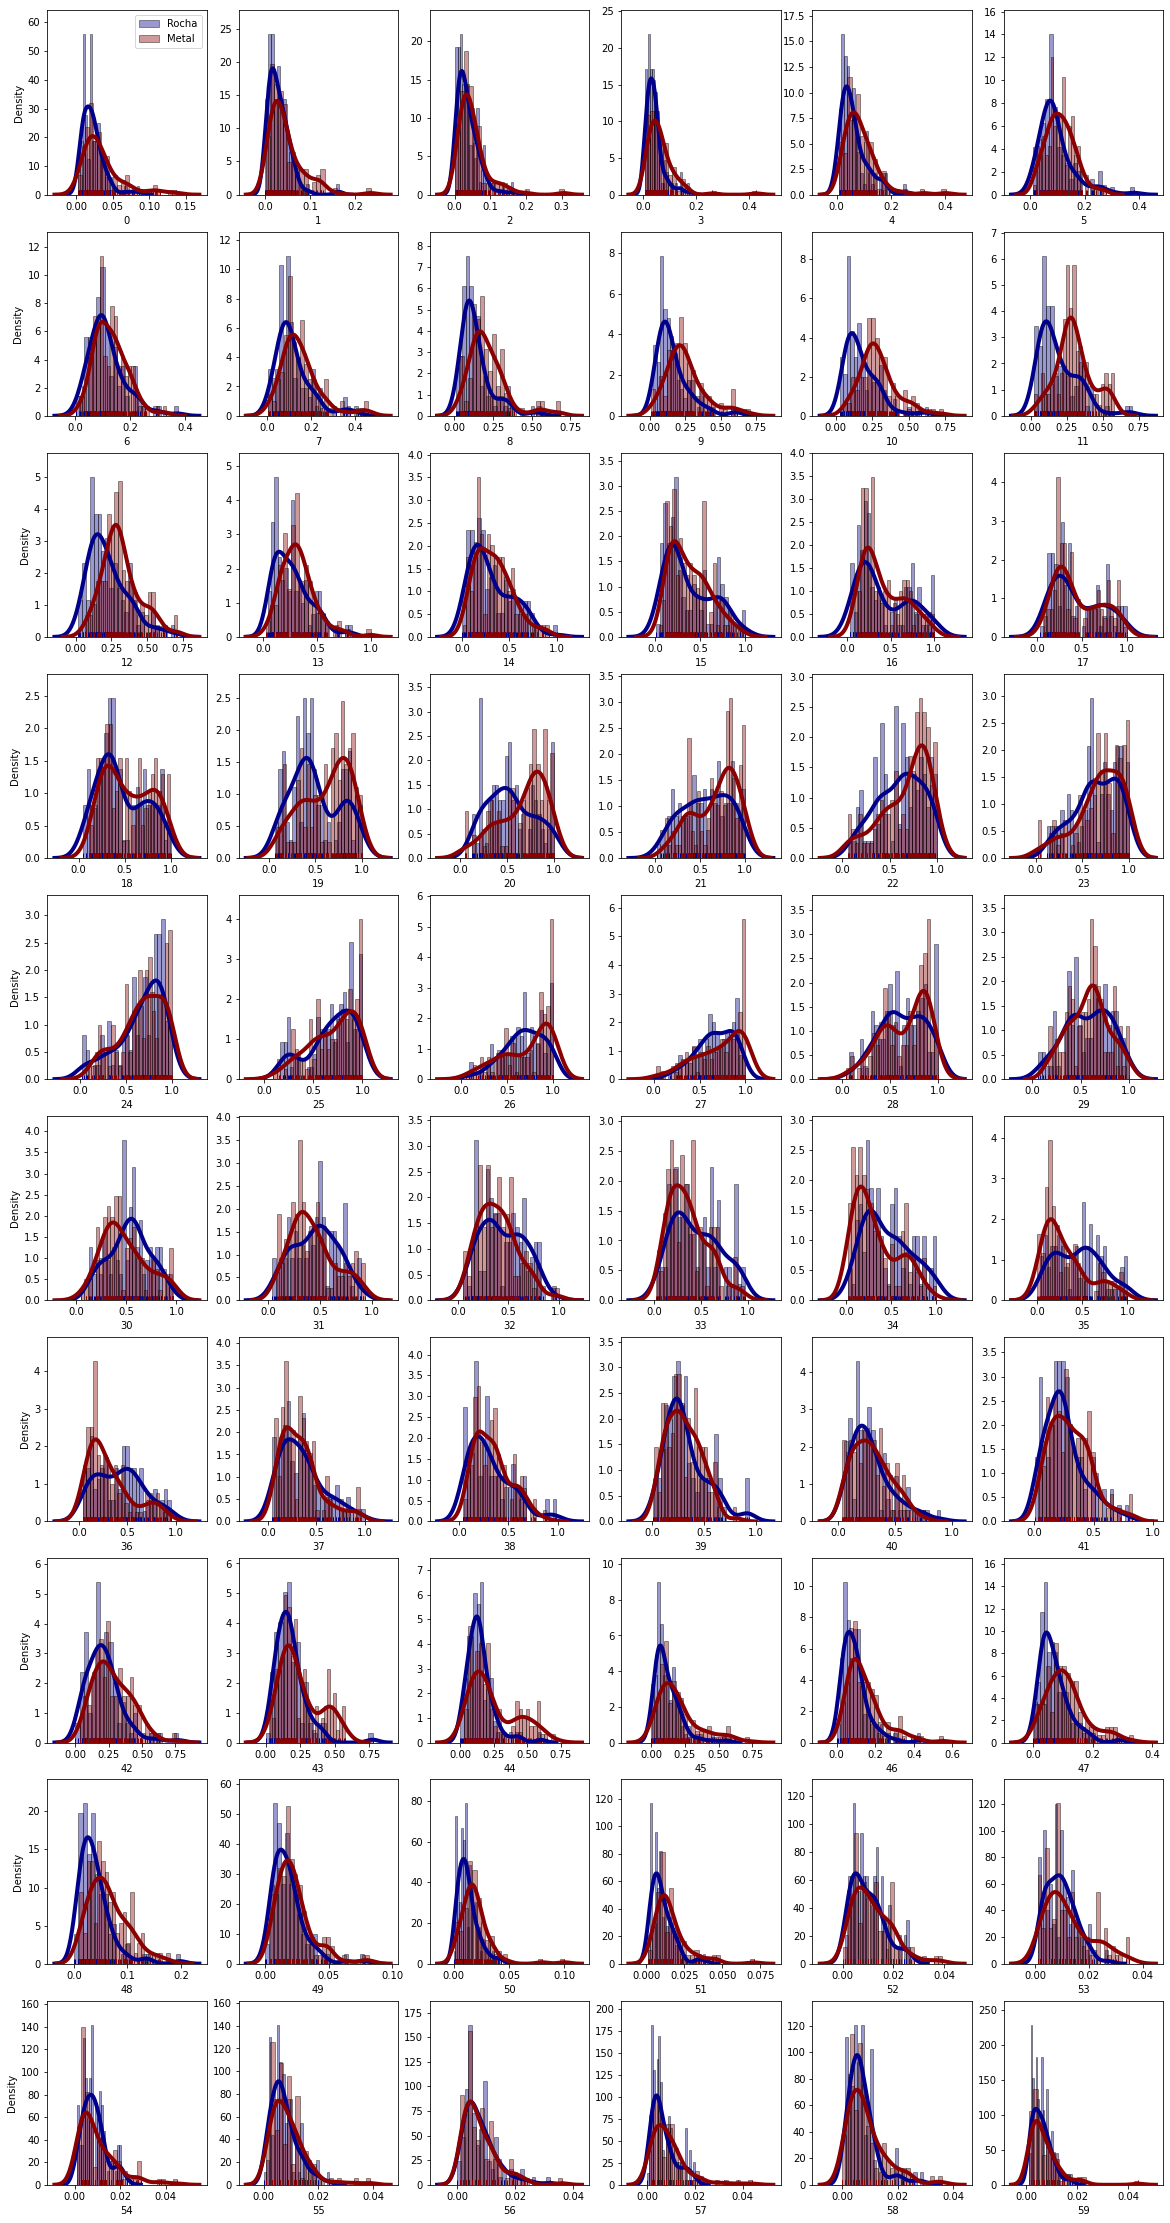

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,40))

for i in range(0,60):
  
  plt.subplot(10,6,i+1)

  sns.distplot(df_Rock[i], hist=True, kde=True, rug = True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label='Rocha')
  
  sns.distplot(df_Metal[i], hist=True, kde=True, rug = True, 
             bins=25, color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label='Metal')
  
  if i%6==0 or i==0:
    plt.ylabel('Density')
  else:
    plt.ylabel('')

  if i==0:
    plt.legend()

**Função que irá realizar o deploy**

In [ ]:
# Deploy básico

def ClassificadorRockMetal(v):
  dados0 = {'v0': [v[0]], 'v4': [v[1]], 'v8': [v[2]], 'v12': [v[3]], 'v16': [v[4]],'v20': [v[5]],
            'v24': [v[6]], 'v28': [v[7]], 'v32': [v[8]], 'v36': [v[9]], 'v40': [v[10]], 'v44': [v[11]],
            'v48': [v[12]], 'v52': [v[13]], 'v56': [v[14]],}

  dados = pd.DataFrame(dados0)

  with open('model.pkl', 'rb') as f:
    modelo = pickle.load(f)

  pred = model.predict(dados)

  if pred==['R']:
    pred = ['Rocha']
  else:
    pred = ['Metal']
  
  print(' ')

  print('Predição do sonar com base nos dados fornecidos: {}'.format(pred))

# Teste final

Vamos tomar uma amostra qualquer do conjunto de testes e somar um ruído a cada valor das variáveis (colunas)

In [ ]:
X_test_2.iloc[[2]] + np.random.rand(15)*1e-3

,0,4,8,12,16,20,24,28,32,36,40,44,48,52,56
27,0.018869,0.063183,0.062568,0.456493,0.515032,0.486476,1.000551,0.864744,0.333655,0.079383,0.153189,0.111716,0.036728,0.012044,0.010265


Sabemos que o label desta amostra é `Rocha`. Vamos testar nosso modelo para verificar se a predição condiz com a realidade.

In [ ]:
y_test_2.iloc[[2]]

27    R
Name: var_alvo, dtype: object

**Predição**

In [ ]:
amostra_ = X_test_2.iloc[[2]].values.tolist()
amostra = amostra_[0]

predicao = ClassificadorRockMetal(amostra)

 
Predição do sonar com base nos dados fornecidos: ['Rocha']


O modelo conseguiu predizer com sucesso para esta amostra. 

Vamos considerar agora a figura anterior com as distribuições para as amostras de `Rocha` e `Metal`. Observamos que as variáveis de números `8, 12, 20` e `36` são as que mais apresentam discrepâncias em relação às demais. Tomaremos então a amostra utilizada rotulada como `Rocha` e iremos substituir valores nestas variáveis mencionadas de modo a tornar a amostra mais próxima do rótulo de `Metal` e verificar se o modelo consegue captar esta mudança e alterar a saída.

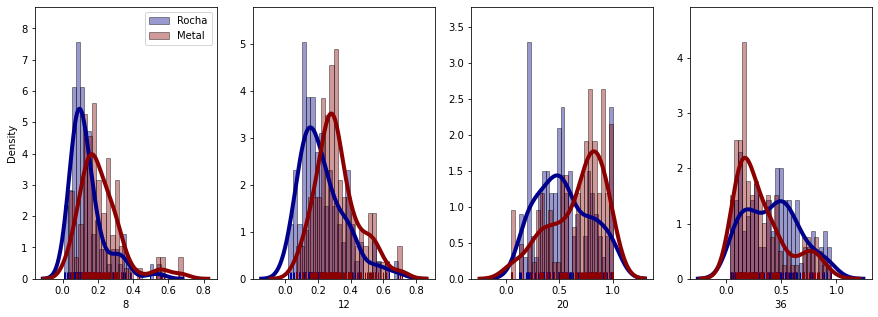

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,5))
cont = 0

for i in [8,12,20,36]:

  plt.subplot(1,4,cont+1)
  cont += 1

  sns.distplot(df_Rock[i], hist=True, kde=True, rug = True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label='Rocha')
  
  sns.distplot(df_Metal[i], hist=True, kde=True, rug = True, 
             bins=25, color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label='Metal')
  
  if cont==1:
    plt.ylabel('Density')
  else:
    plt.ylabel('')

  if cont==1:
    plt.legend()

In [ ]:
amostra[2] = 0.6 # corresponde à coluna [8]
amostra[3] = 0.5 # corresponde à coluna [12]
amostra[5] = 0.8  # corresponde à coluna [20]
amostra[9] = 0.1  # corresponde à coluna [36]

**Predição com alterações**

In [ ]:
predicao = ClassificadorRockMetal(amostra)

 
Predição do sonar com base nos dados fornecidos: ['Metal']


Verificamos que o modelo conseguiu alterar a predição somente com mudanças em algumas variáveis em específico. Se alterássemos outras variáveis que não tivessem tanta discrepância em relação aos labels, possivelmente não teríamos a alteração do rótulo tão facilmente como foi obtido.